In [ ]:
## import required libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
## import dataset

In [6]:
df = pd.read_csv(r"D:\praivate\كورس\data analyze\project\Insurance Cost Data Set\D__praivate_كورس_data analyze_project_Insurance Cost Data Set_ewproject.csv")

In [ ]:
## prepare dataset

In [7]:
df.head()

,Unnamed: 0,19,1,27.9,0,1.1,3,16884.924
0,0,18,2,33.770,1,0,4,1725.55230
1,1,28,2,33.000,3,0,4,4449.46200
2,2,33,2,22.705,0,0,1,21984.47061
3,3,32,2,28.880,0,0,1,3866.85520
4,4,31,1,25.740,0,?,4,3756.62160


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2771 non-null   int64  
 1   19          2771 non-null   object 
 2   1           2771 non-null   int64  
 3   27.9        2771 non-null   float64
 4   0           2771 non-null   int64  
 5   1.1         2771 non-null   object 
 6   3           2771 non-null   int64  
 7   16884.924   2771 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 173.3+ KB


In [16]:
df.drop('Unnamed: 0' , axis = 1 ,inplace =True)

In [17]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers

In [28]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,0,4,3756.62160


In [24]:
## Clean data

In [22]:
df.replace('?' ,np.nan ,inplace=True)

In [29]:
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df['smoker'].replace(np.nan,is_smoker,inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean()
df['age'].replace(np.nan,mean_age,inplace=True)

# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int32  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   int32  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB
None


In [32]:
## Exploratory Data Analysis

(0.0, 66902.8557155)

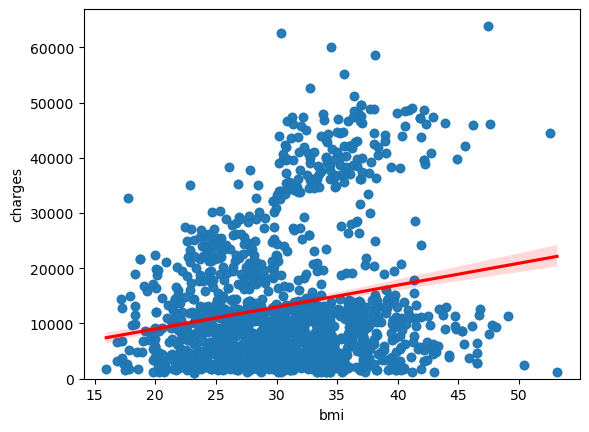

In [34]:
## Emplement regression plot charages with respect bmi
sns.regplot(x='bmi' ,y='charges' ,data=df,line_kws={"color": "red"})
plt.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

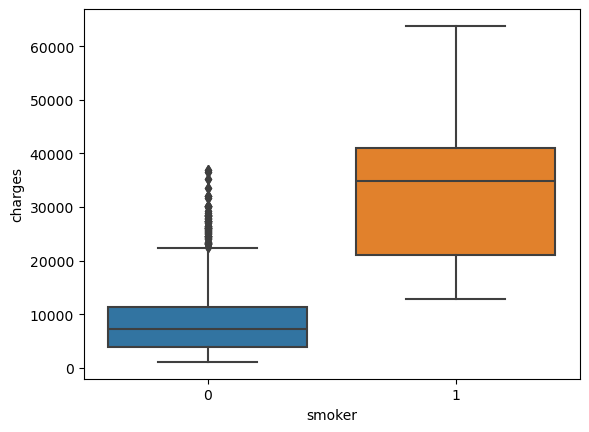

In [35]:
## implement boxplot charges with respect to smoker
sns.boxplot(x='smoker', y='charges', data=df)

In [36]:
## Print the correlation matrix for the dataset
print(df.corr() )

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026584  0.112859        0.037126 -0.022290   
gender         -0.026584  1.000000  0.042766        0.015693  0.083125   
bmi             0.112859  0.042766  1.000000       -0.001642  0.011824   
no_of_children  0.037126  0.015693 -0.001642        1.000000  0.007016   
smoker         -0.022290  0.083125  0.011824        0.007016  1.000000   
region         -0.006969  0.022360  0.271200       -0.025594  0.053839   
charges         0.298892  0.062959  0.199906        0.066551  0.789141   

                  region   charges  
age            -0.006969  0.298892  
gender          0.022360  0.062959  
bmi             0.271200  0.199906  
no_of_children -0.025594  0.066551  
smoker          0.053839  0.789141  
region          1.000000  0.054018  
charges         0.054018  1.000000  


In [37]:
## model development

In [40]:
##Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset.
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))

0.6227430384081845


In [41]:
## Fit a linear regression model that may be used to predict the `charges` value, just by using all other attributes of the dataset.
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))

0.7505888658724134


In [42]:
 ## Create a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` 
## to create a model that can predict the `charges` value using all the other attributes of the dataset. 
# Y and Z use the same values as defined in previous cells 
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))



0.8453697242562691


In [43]:
# Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.
# Z and Y hold same values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

In [44]:
#Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset.
# # x_train, x_test, y_train, y_test hold same values as in previous cells
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))


0.7254198907320977


In [45]:
# Apply polynomial transformation to the training parameters with degree=2. 
# Use this transformed feature set to fit the same regression model, as above, using the training subset. 
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.8208413223345822
